In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
data = pd.read_csv('csd.csv')

In [19]:
data.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


In [22]:
X = data["SMILES"]
Y = data["Solubility"]

In [23]:
X = X.apply(lambda x: Chem.MolFromSmiles(x))
X = pd.DataFrame([[
        Descriptors.MolWt(mol),
        Descriptors.NumRotatableBonds(mol),
        Descriptors.TPSA(mol)
    ] for mol in X], columns=["MolWt", "NumRotatableBonds", "TPSA"])

[17:40:15] WARNING: not removing hydrogen atom without neighbors
[17:40:15] WARNING: not removing hydrogen atom without neighbors
[17:40:15] WARNING: not removing hydrogen atom without neighbors
[17:40:15] WARNING: not removing hydrogen atom without neighbors
[17:40:15] WARNING: not removing hydrogen atom without neighbors
[17:40:15] WARNING: not removing hydrogen atom without neighbors
[17:40:15] WARNING: not removing hydrogen atom without neighbors
[17:40:15] WARNING: not removing hydrogen atom without neighbors
[17:40:15] WARNING: not removing hydrogen atom without neighbors
[17:40:15] WARNING: not removing hydrogen atom without neighbors
[17:40:15] WARNING: not removing hydrogen atom without neighbors
[17:40:15] WARNING: not removing hydrogen atom without neighbors
[17:40:16] WARNING: not removing hydrogen atom without neighbors
[17:40:16] WARNING: not removing hydrogen atom without neighbors
[17:40:16] WARNING: not removing hydrogen atom without neighbors
[17:40:16] WARNING: not r

In [25]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
# Train the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [28]:

# Evaluate the model
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean squared error: 3.35
R-squared: 0.38


In [42]:
#X_test
tdx= np.random.rand(1997, 3)

In [43]:
tdx = tdx.reshape(-1)

In [45]:
tdy = np.random.rand(1998,1)
tdy = tdx.reshape(-1)

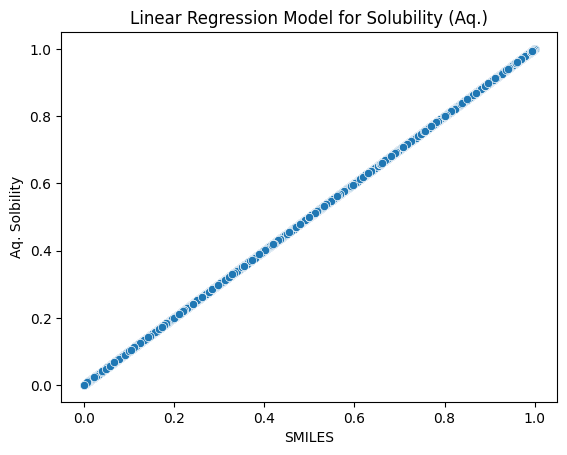

In [47]:
sns.scatterplot(data=train_test_split, x=tdx, y=tdy)
plt.title("Linear Regression Model for Solubility (Aq.)")
plt.xlabel("SMILES")
plt.ylabel("Aq. Solbility")
plt.show()